In [1]:
from scipy.special import kl_div, rel_entr
import numpy as np
import pandas as pd
from scipy.spatial.distance import jensenshannon 
from scipy.stats import kstest 
from scipy.stats import wasserstein_distance
from scipy.stats import rv_histogram 
import scipy
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
device = 'cpu'
gen_dir = 'generated_data/'
models_dir = 'models/'

In [3]:
# Load data
data = np.load('master_data/data.npy')
train_batches = data.shape[0] # N hereafter. Number of training images in database.
length = data.shape[1] 
stocks = data.shape[2]
print('Number of training batches: ', train_batches)
print('Length of each batch: ', length)
print('Number of stocks: ', stocks)

Number of training batches:  79
Length of each batch:  256
Number of stocks:  434


In [4]:
vaeconv1 = np.load(gen_dir + 'vaeconv1.npy')
vaeconv3 = np.load(gen_dir + 'vaeconv3.npy')
vaefd1 = np.load(gen_dir + 'vaefd1.npy')
vaefd2 = np.load(gen_dir + 'vaefd2.npy')
vqvaeconv2 = np.load(gen_dir + 'vqvaeconv2.npy')
vqvaefd1 = np.load(gen_dir + 'vqvaefd1.npy')


In [5]:
generated = {
            'VQ VAE CONV2':vqvaeconv2,
            'VAE CONV1 ':vaeconv1,
             'VAE CONV3':vaeconv3,
             'VAE FD1':vaefd1,
             'VAE FD2':vaefd2,
             'VQ VAE FD1':vqvaefd1
             }

In [6]:
# Random batches
index = np.random.randint(0, train_batches, 4)
index = [38, 25, 56, 24]

In [7]:
data_eval = np.zeros((len(index), data.shape[2], data.shape[1]))
# print(data_eval.shape)
for i in range(len(index)):
    # print(i)
    batch = data[index[i], :, :].copy()
    batch = np.transpose(batch)
    data_eval[i] = batch
data_eval.shape

(4, 434, 256)

In [8]:
i = 0
real = data_eval[i].flatten()
synth =vqvaeconv2.flatten()

In [9]:
real

array([ 0.00242962, -0.00655488,  0.00506018, ..., -0.03029058,
       -0.01097264, -0.02951868])

In [10]:
synth

array([-0.00603489,  0.00441606,  0.00282743, ...,  0.01176338,
        0.0064674 ,  0.00446358])

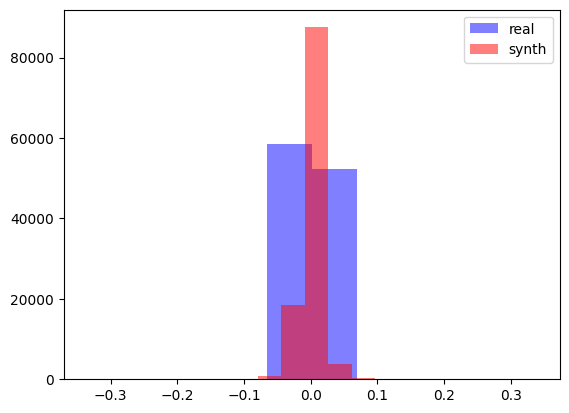

In [11]:
# bins = 100
plt.hist(real,  alpha=0.5, label='real', color='b')
plt.hist(synth,  alpha=0.5, label='synth', color='r')
plt.legend(loc='upper right')
plt.show()

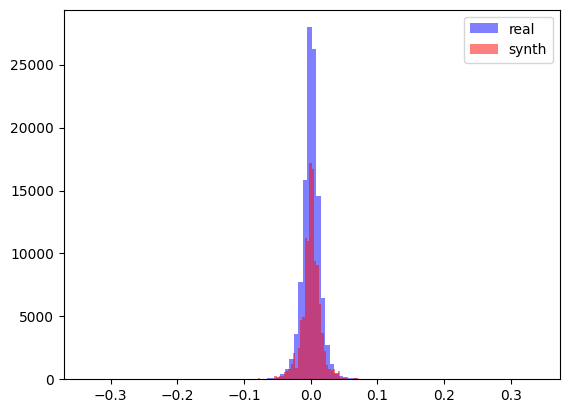

In [12]:
bins = 100
plt.hist(real, bins, alpha=0.5, label='real', color='b')
plt.hist(synth, bins, alpha=0.5, label='synth', color='r')
plt.legend(loc='upper right')
plt.show()

In [13]:
real = pd.DataFrame(real)
real['label'] = 'Real distribution'
real.columns = ['value', 'label']

synth = pd.DataFrame(synth)
synth['label'] = 'Synthetic distribution'
synth.columns = ['value', 'label']
df = pd.concat([real, synth])

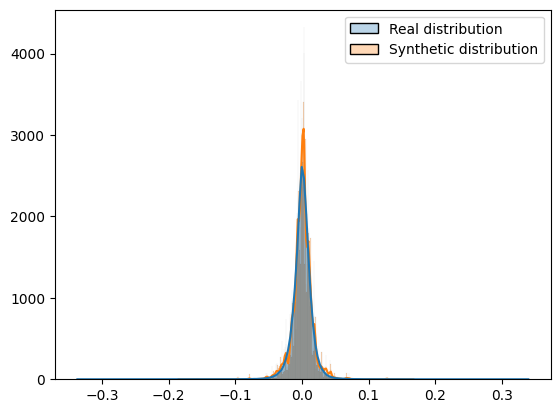

In [16]:
g =sns.histplot(df,
    bins='auto',
    kde=True,
    x = 'value',
    hue='label',
    stat="count",
    # facet_kws={'legend_out': False}, 
    alpha=0.3,
    common_bins=False,
    # ax=axes[i//2, i%2]
            )
g.set(xlabel= None, ylabel= None )
g.legend_.set_title(None)

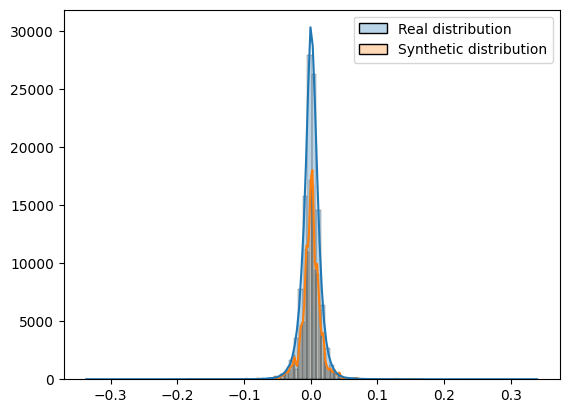

In [18]:
bins = 100
g =sns.histplot(df,
    bins=bins,
    kde=True,
    x = 'value',
    hue='label',
    stat="count",
    # facet_kws={'legend_out': False}, 
    alpha=0.3,
    common_bins=False,
    # ax=axes[i//2, i%2]
            )
g.set(xlabel= None, ylabel= None )
g.legend_.set_title(None)

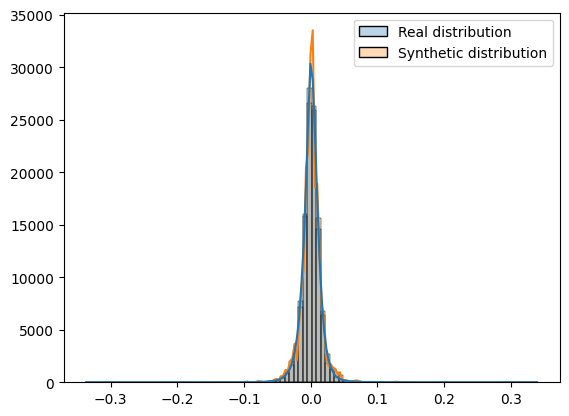

In [19]:
bins = 100
g =sns.histplot(df,
    bins=bins,
    kde=True,
    x = 'value',
    hue='label',
    stat="count",
    # facet_kws={'legend_out': False}, 
    alpha=0.3,
    common_bins=True,
    # ax=axes[i//2, i%2]
            )
g.set(xlabel= None, ylabel= None )
g.legend_.set_title(None)

In [1]:
from CustomGenerator import ReturnsDataGen
import numpy as np

In [2]:
# Load data
data = np.load('/master_data/data.npy')
train_batches = data.shape[0] # N hereafter. Number of training images in database.
length = data.shape[1] 
stocks = data.shape[2]
print('Number of training batches: ', train_batches)
print('Length of each batch: ', length)
print('Number of stocks: ', stocks)

FileNotFoundError: [Errno 2] No such file or directory: '/master_data/data.npy'